<p style="text-align:center;">
<img src="https://github.com/digital-futures-academy/DataScienceMasterResources/blob/main/Resources/datascience-notebook-header.png?raw=true"
     alt="DigitalFuturesLogo"
     style="float: center; margin-right: 10px;" />
</p>

# Swan Teleco Notebook 
## Presented By Group 5: Finn, Richard, Kristen


Importing all the packages neeeded for data manipulation, visualisation, regression modeling, and model evaluation here. 

In [1]:
# EDA
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Import the metrics we'll be using
from sklearn import metrics
from time import time

## Import Logistic Regression from sklearn
from sklearn.linear_model import LogisticRegression

## Outputs plots below the code cell that produces it
%matplotlib inline

# Import Split, Modeling & Model Evaluation from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import (confusion_matrix, accuracy_score)

from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

pd.set_option('display.max_columns', 50)

%config InlineBackend.figure_format = 'retina' # Makes the visualisations higher quality

## 1. EDA
### 1.1 Data Exploration

In [2]:
## Read in the data
df = pd.read_csv('Data.csv')

In [3]:
## Checking the dimensions of the data
df.shape

(7043, 31)

In [4]:
## Checking the first 5 rows of our data
df.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,No,No,Yes,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,No,No,Yes,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,No,No,Yes,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,Competitor had better devices


In [5]:
## Checking the columns, their null values, and their data types
df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

In [6]:
## Change the total charges column to numeric
df['Total Charges'] = df['Total Charges'].str.strip()
df['Total Charges'] = pd.to_numeric(df['Total Charges'])

## Check the dtype
df['Total Charges'].dtype

dtype('float64')

In [7]:
## Find the null values for Total Charges
df.loc[df['Total Charges'].isnull()]

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Reason
2234,4472-LVYGI,1,United States,California,San Bernardino,92408,"34.084909, -117.258107",34.084909,-117.258107,Female,No,Yes,No,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No,0,NaN
2438,3115-CZMZD,1,United States,California,Independence,93526,"36.869584, -118.189241",36.869584,-118.189241,Male,No,No,No,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No,0,NaN
2568,5709-LVOEQ,1,United States,California,San Mateo,94401,"37.590421, -122.306467",37.590421,-122.306467,Female,No,Yes,No,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No,0,NaN
2667,4367-NUYAO,1,United States,California,Cupertino,95014,"37.306612, -122.080621",37.306612,-122.080621,Male,No,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No,0,NaN
2856,1371-DWPAZ,1,United States,California,Redcrest,95569,"40.363446, -123.835041",40.363446,-123.835041,Female,No,Yes,No,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No,0,NaN
4331,7644-OMVMY,1,United States,California,Los Angeles,90029,"34.089953, -118.294824",34.089953,-118.294824,Male,No,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No,0,NaN
4687,3213-VVOLG,1,United States,California,Sun City,92585,"33.739412, -117.173334",33.739412,-117.173334,Male,No,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No,0,NaN
5104,2520-SGTTA,1,United States,California,Ben Lomond,95005,"37.078873, -122.090386",37.078873,-122.090386,Female,No,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No,0,NaN
5719,2923-ARZLG,1,United States,California,La Verne,91750,"34.144703, -117.770299",34.144703,-117.770299,Male,No,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No,0,NaN
6772,4075-WKNIU,1,United States,California,Bell,90201,"33.970343, -118.171368",33.970343,-118.171368,Female,No,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No,0,NaN


In [8]:
## We see that it is when 'Tenure Months' = 0, so we will set these total charges as 0.
df['Total Charges'] = df['Total Charges'].fillna(value = 0)

## Check this has worked
df['Total Charges'].isnull().sum()

0

In [9]:
## An easy fix for removing the null values here: fill all with 'Didn't Churn'.

df['Churn Reason'] = df['Churn Reason'].fillna(value = 'Didn\'t Churn')

## Did it work?
df['Churn Reason'].isnull().sum()
## Yes

0

In [10]:
# Check the most common Churn reasons - these can be aggregated later, 20 different reasons
df.groupby('Churn Reason')[['Count']].count().sort_values(by = 'Count', ascending = False)

,Count
Churn Reason,
Didn't Churn,5174
Attitude of support person,192
Competitor offered higher download speeds,189
Competitor offered more data,162
Don't know,154
Competitor made better offer,140
Attitude of service provider,135
Competitor had better devices,130
Network reliability,103


In [11]:
def Churn_Reason(df):
    
    # Copy the dataframe
    df = df.copy()

    # Define the mapping of churn reasons to simplified reasons
    reason_mapping = {
        'Attitude of support person': 'Service issues',
        'Attitude of service provider': 'Service issues',
        'Service dissatisfaction': 'Service issues',
        'Lack of self-service on Website': 'Service issues',
        'Poor expertise of phone support': 'Service issues',
        'Limited range of services': 'Service issues',
        'Competitor offered higher download speeds': 'Competitor',
        'Competitor offered more data': 'Competitor',
        'Competitor had better devices': 'Competitor',
        'Competitor made better offer': 'Competitor',
        'Network reliability': 'Product issues',
        'Product dissatisfaction': 'Product issues',
        'Lack of affordable download/upload speed': 'Product issues',
        'Price too high': 'Price issues',
        'Extra data charges': 'Price issues',
        'Long distance charges': 'Price issues',
        'Moved': 'Not at property',
        'Deceased': 'Not at property',
        'Poor expertise of online support': 'Service issues'
    }

    # Map the churn reasons to simplified reasons using isin() and map()
    df['Churn Reason Simple'] = df['Churn Reason'].map(lambda x: reason_mapping[x] if x in reason_mapping else x)

    return df

df = Churn_Reason(df)
df.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Reason,Churn Reason Simple
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,Competitor made better offer,Competitor
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,No,No,Yes,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,Moved,Not at property
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,No,No,Yes,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes,1,Moved,Not at property
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,Moved,Not at property
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,No,No,Yes,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,Yes,1,Competitor had better devices,Competitor


### 1.2 Data Visualisations

Note: A select number of these are also included in the information deck, along with other key visualisations

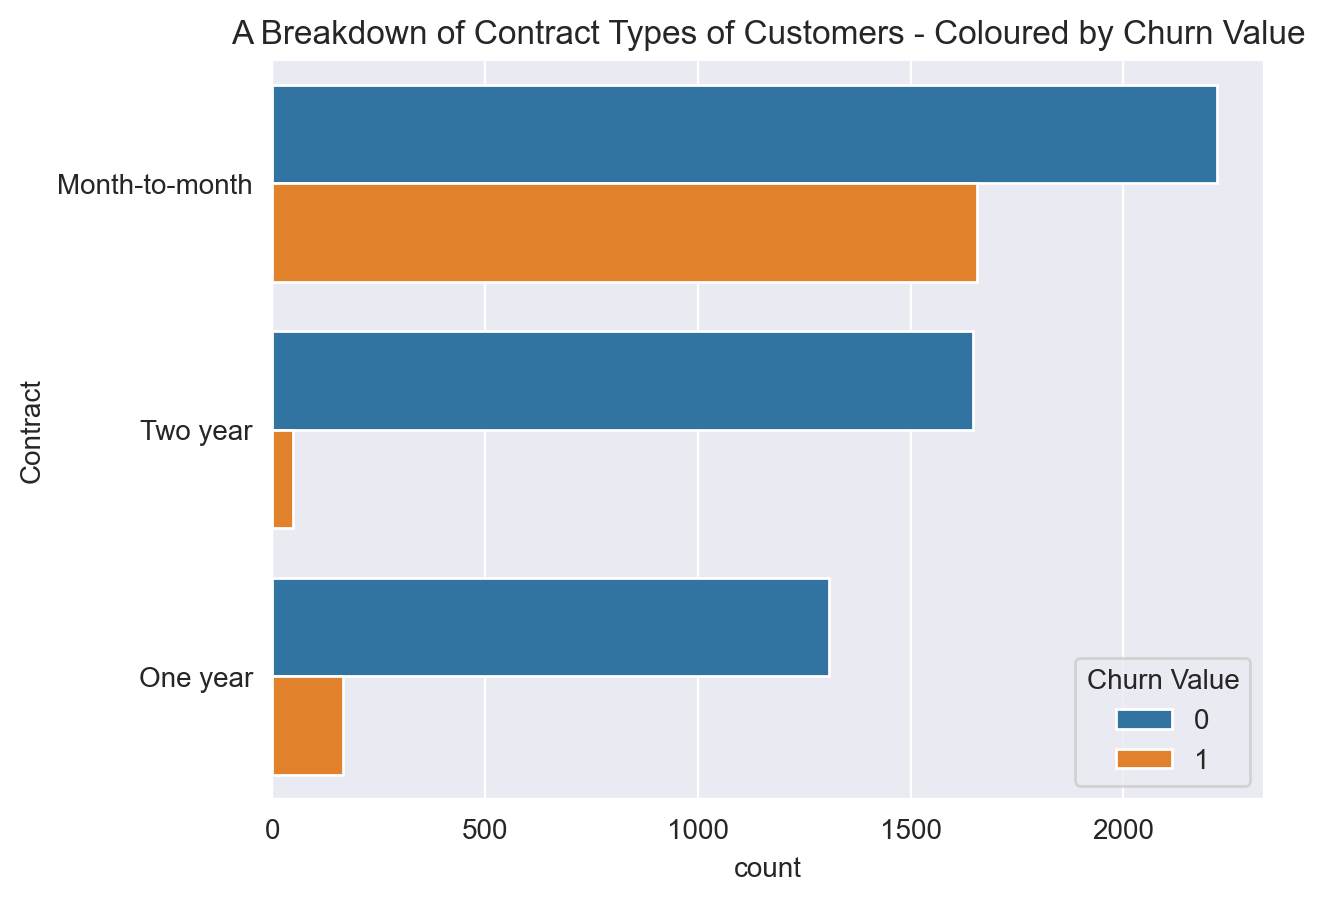

In [12]:
sns.countplot(data = df,
              y = 'Contract',
              hue = 'Churn Value')

plt.title('A Breakdown of Contract Types of Customers - Coloured by Churn Value')

plt.show()

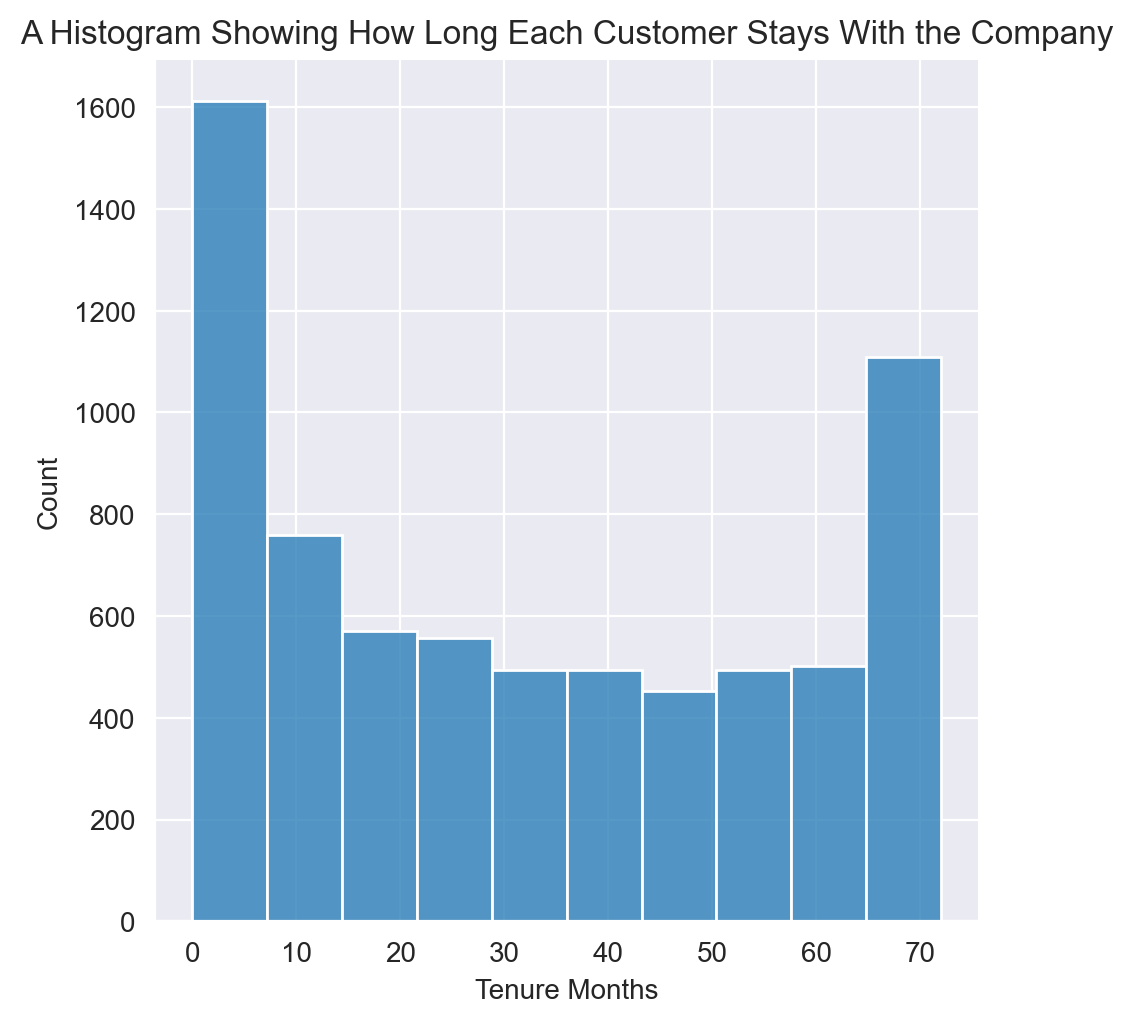

In [13]:
sns.displot(df['Tenure Months'], bins = 10)

plt.title('A Histogram Showing How Long Each Customer Stays With the Company')

plt.show()

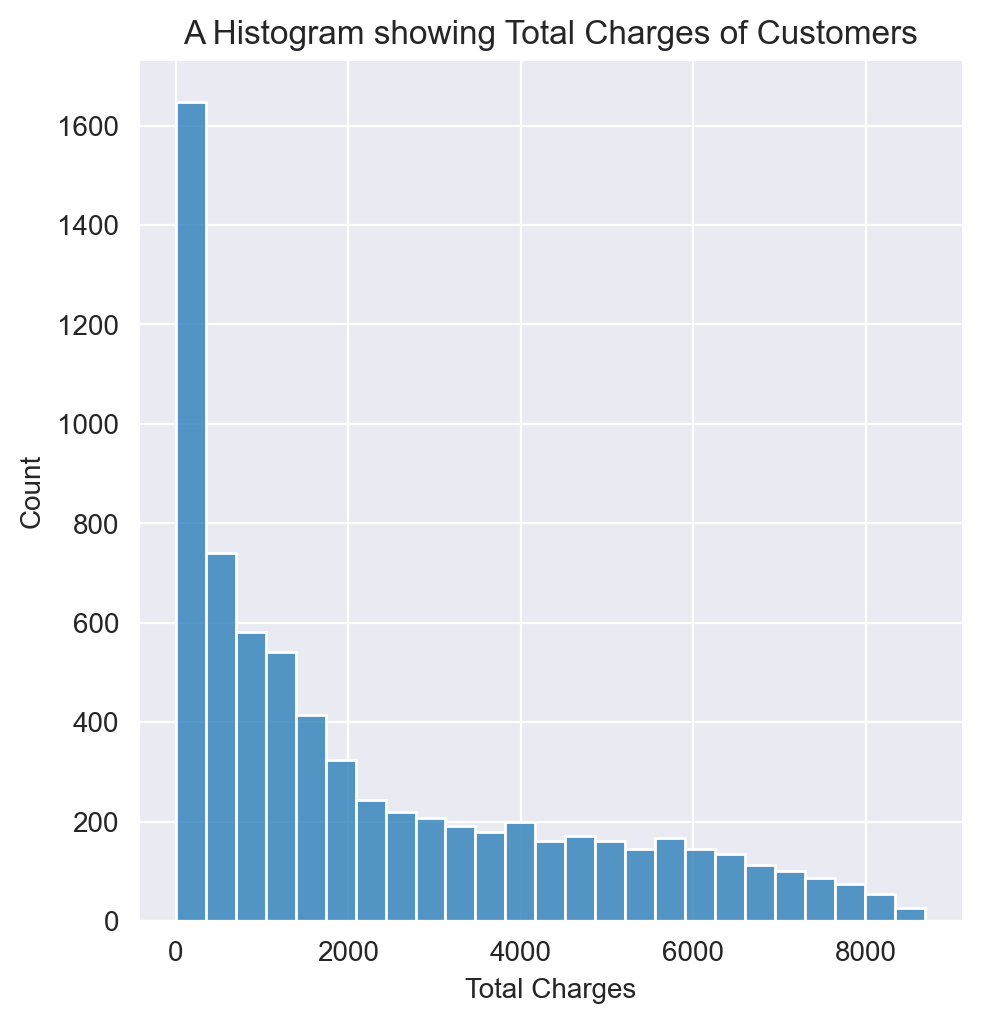

In [14]:
sns.displot(df['Total Charges'])

plt.title('A Histogram showing Total Charges of Customers')

plt.show()

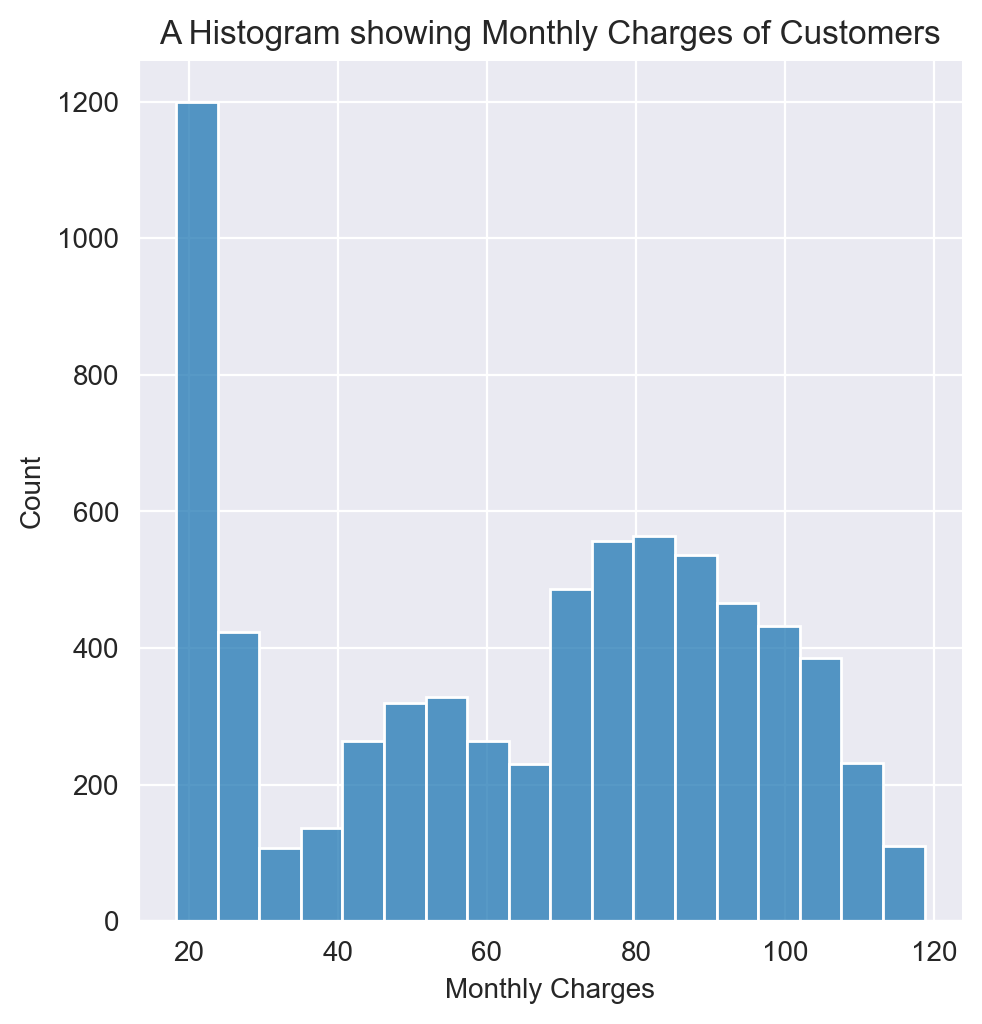

In [15]:
sns.displot(df['Monthly Charges'])

plt.title('A Histogram showing Monthly Charges of Customers')

plt.show()

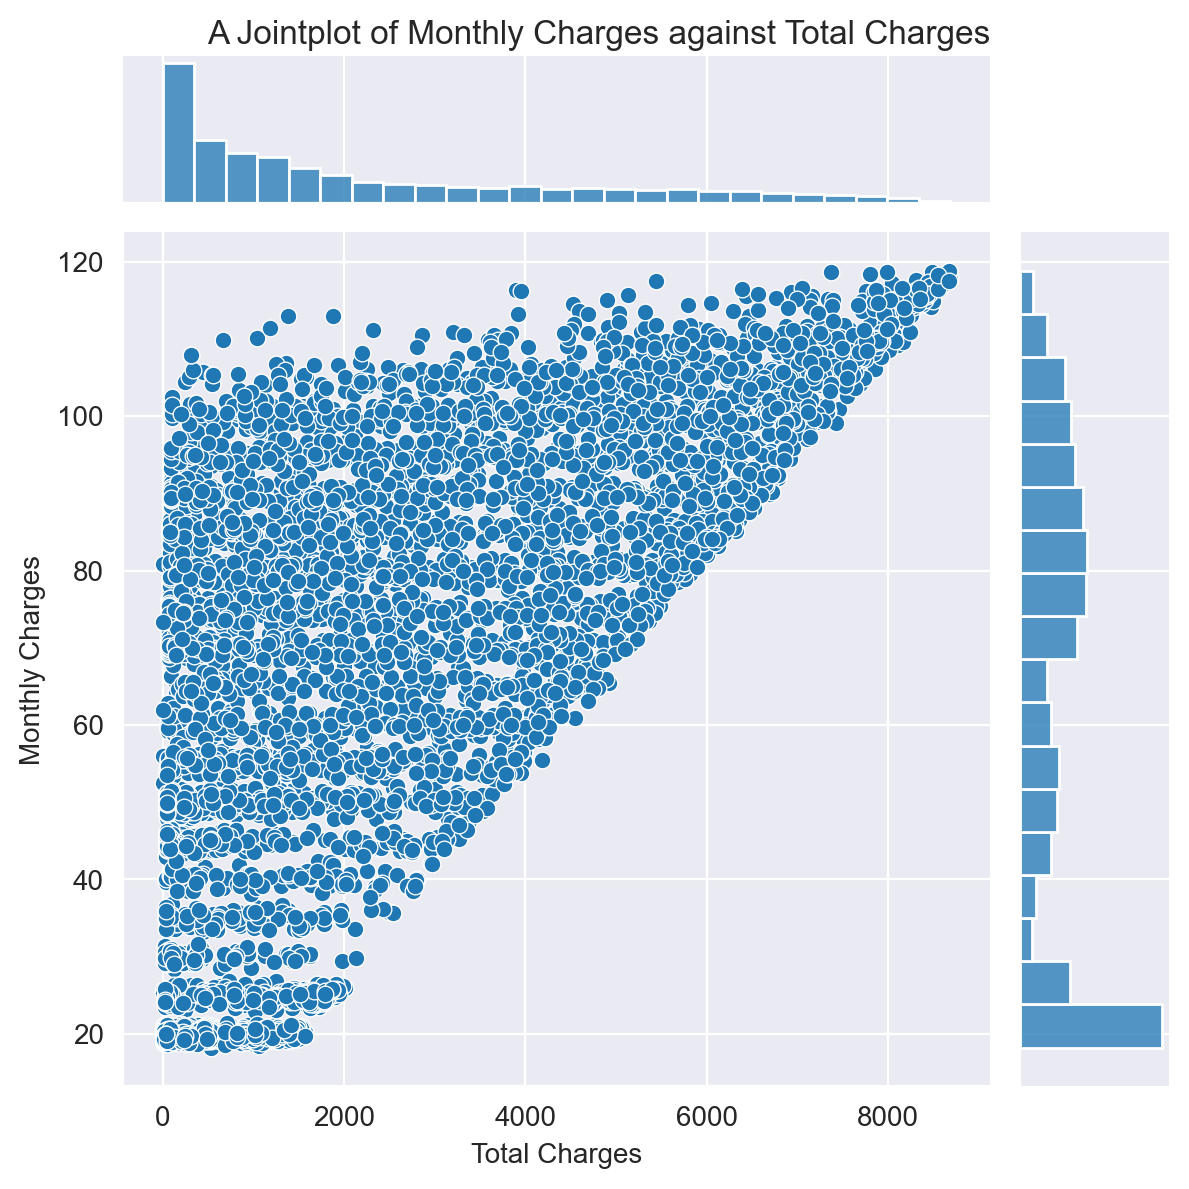

In [16]:
sns.jointplot(data = df, x = 'Total Charges', y = 'Monthly Charges')

plt.suptitle('A Jointplot of Monthly Charges against Total Charges')
plt.subplots_adjust(top=0.95)

plt.show()

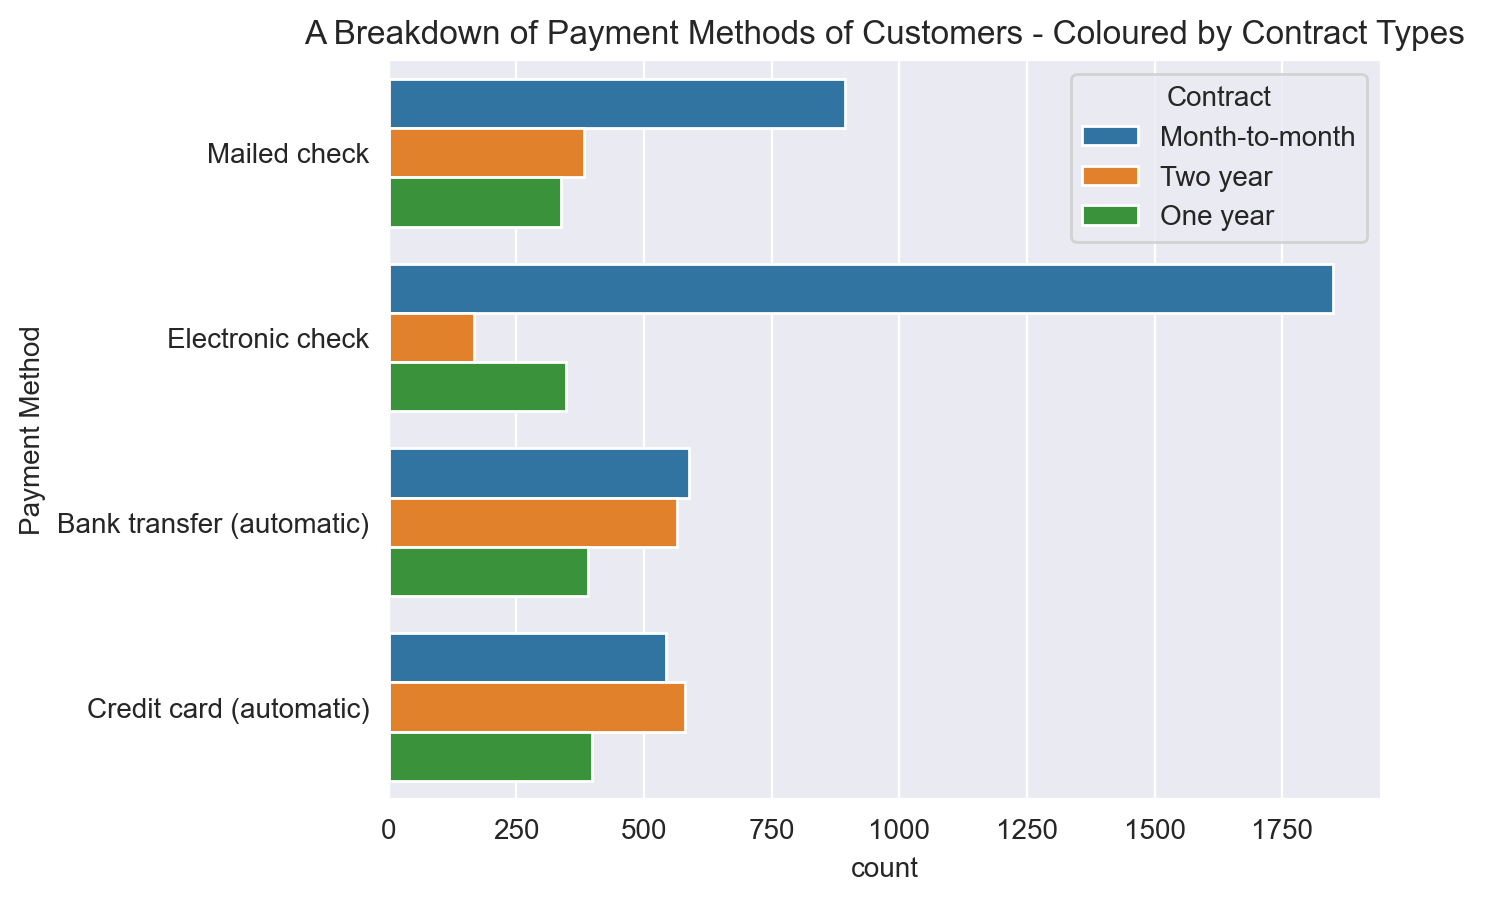

In [17]:
sns.countplot(data = df,
             y = 'Payment Method',
             hue = 'Contract')

plt.title('A Breakdown of Payment Methods of Customers - Coloured by Contract Types')

plt.show()

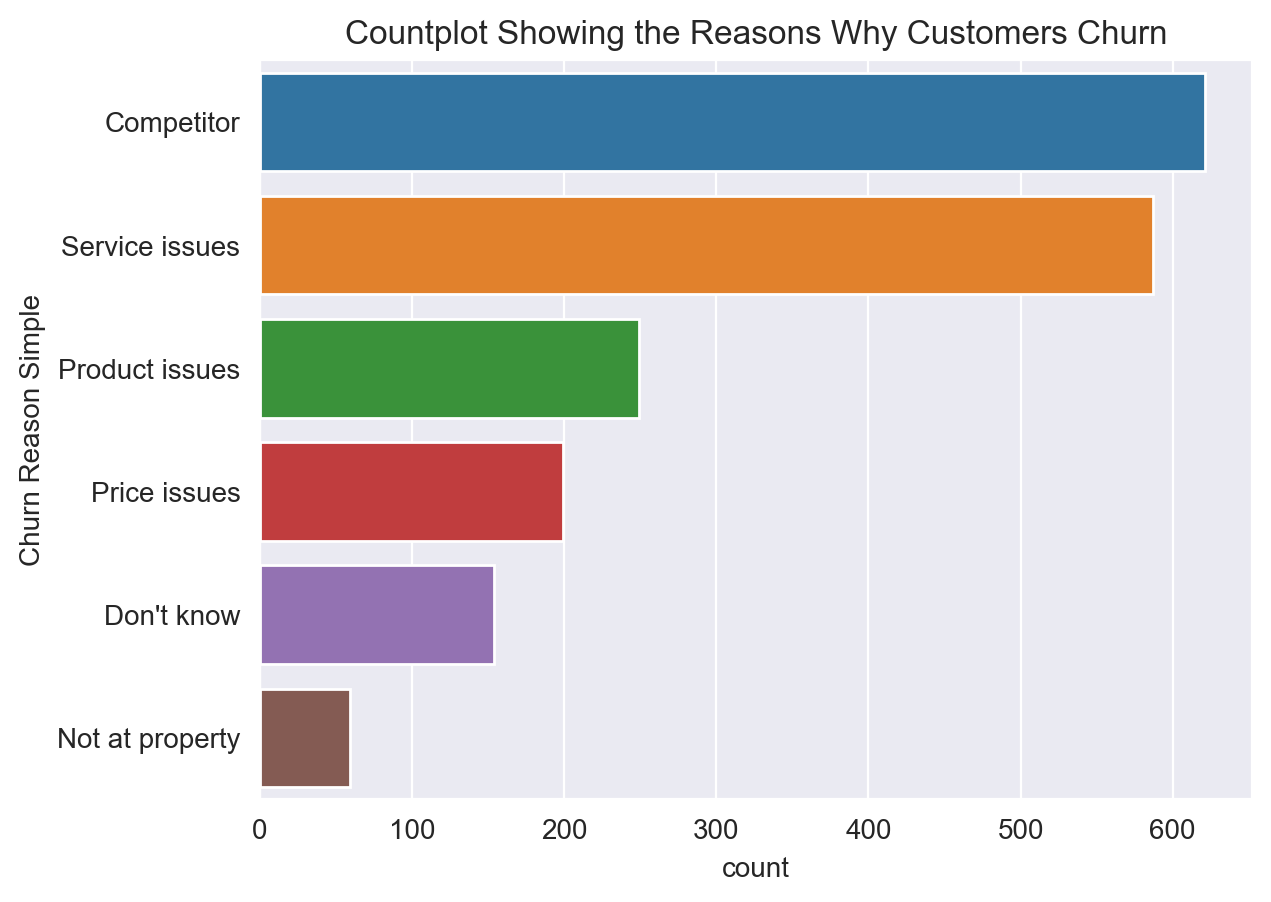

In [18]:
churned_df = df[df['Churn Reason Simple'] != "Didn't Churn"]

sns.countplot(data = churned_df,
              y = 'Churn Reason Simple',
              order = churned_df['Churn Reason Simple'].value_counts().index)

plt.title('Countplot Showing the Reasons Why Customers Churn')

plt.show()

## 2. Feature Engineering

In [19]:
## Define a feature engineering function - this will allow us to create a numeric dataframe
def F_Engineering(df):

    ## Create a copy of the dataframe
    df1 = df.copy()

    ## These columns can be mapped to binary values i.e. 1 - Yes,
    ## 0 - {No, No internet service, No phone service}
    columns_to_map = ['Senior Citizen', 'Partner', 'Dependents', 'Phone Service', 'Multiple Lines',
                      'Online Security', 'Online Backup', 'Device Protection', 'Tech Support',
                      'Streaming TV', 'Streaming Movies', 'Paperless Billing']

    ## These columns can be OHE
    internet_dummies = pd.get_dummies(df1['Internet Service'], prefix='Internet', drop_first = True)
    contract_dummies = pd.get_dummies(df1['Contract'], prefix = 'Contract', drop_first = False)
    payment_dummies = pd.get_dummies(df1['Payment Method'], prefix = 'Payment', drop_first = True)

    dummies = [internet_dummies, contract_dummies, payment_dummies]

    ## This column can be binary encoded as well, 0 - Male, 1 - Female
    gender = ['Gender']

    for column in df1:
        if column in columns_to_map:
            df1[column].replace({'No': 0, 'No internet service': 0, 'No phone service':0, 'Yes': 1},
                                inplace = True)
        elif column == 'Gender':
            df1['Gender'] = df1['Gender'].map({'Female':1, 'Male':0})
        else:
            pass

    for dummy in dummies:
        df1 = df1.join(dummy)

    ## Drop non-numerical columns
    df1.drop(columns = ['Internet Service', 'Contract', 'Payment Method',
                        'City', 'Zip Code', 'Churn Reason', 'Churn Reason Simple',
                        'Count', 'Country', 'State', 'Lat Long', 'Latitude', 'Longitude',
                        'Churn Label'], inplace = True)

    return df1

## Quickly check it has all worked

df1 = F_Engineering(df)
df1.head()

,CustomerID,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Paperless Billing,Monthly Charges,Total Charges,Churn Value,Internet_Fiber optic,Internet_No,Contract_Month-to-month,Contract_One year,Contract_Two year,Payment_Credit card (automatic),Payment_Electronic check,Payment_Mailed check
0,3668-QPYBK,0,0,0,0,2,1,0,1,1,0,0,0,0,1,53.85,108.15,1,0,0,1,0,0,0,0,1
1,9237-HQITU,1,0,0,1,2,1,0,0,0,0,0,0,0,1,70.70,151.65,1,1,0,1,0,0,0,1,0
2,9305-CDSKC,1,0,0,1,8,1,1,0,0,1,0,1,1,1,99.65,820.50,1,1,0,1,0,0,0,1,0
3,7892-POOKP,1,0,1,1,28,1,1,0,0,1,1,1,1,1,104.80,3046.05,1,1,0,1,0,0,0,1,0
4,0280-XJGEX,0,0,0,1,49,1,1,0,1,1,0,1,1,1,103.70,5036.30,1,1,0,1,0,0,0,0,0


In [20]:
df1['Senior Citizen'].value_counts()

0    5901
1    1142
Name: Senior Citizen, dtype: int64

In [21]:
## Select all numeric columns in the dataframe
corr_columns = ['Gender', 'Senior Citizen', 'Partner', 'Dependents', 'Tenure Months', 'Phone Service',
                'Multiple Lines', 'Online Security', 'Online Backup', 'Device Protection', 'Tech Support',
                'Streaming TV', 'Streaming Movies', 'Paperless Billing', 'Monthly Charges', 'Total Charges',
                'Churn Value']

<Figure size 2000x2000 with 0 Axes>

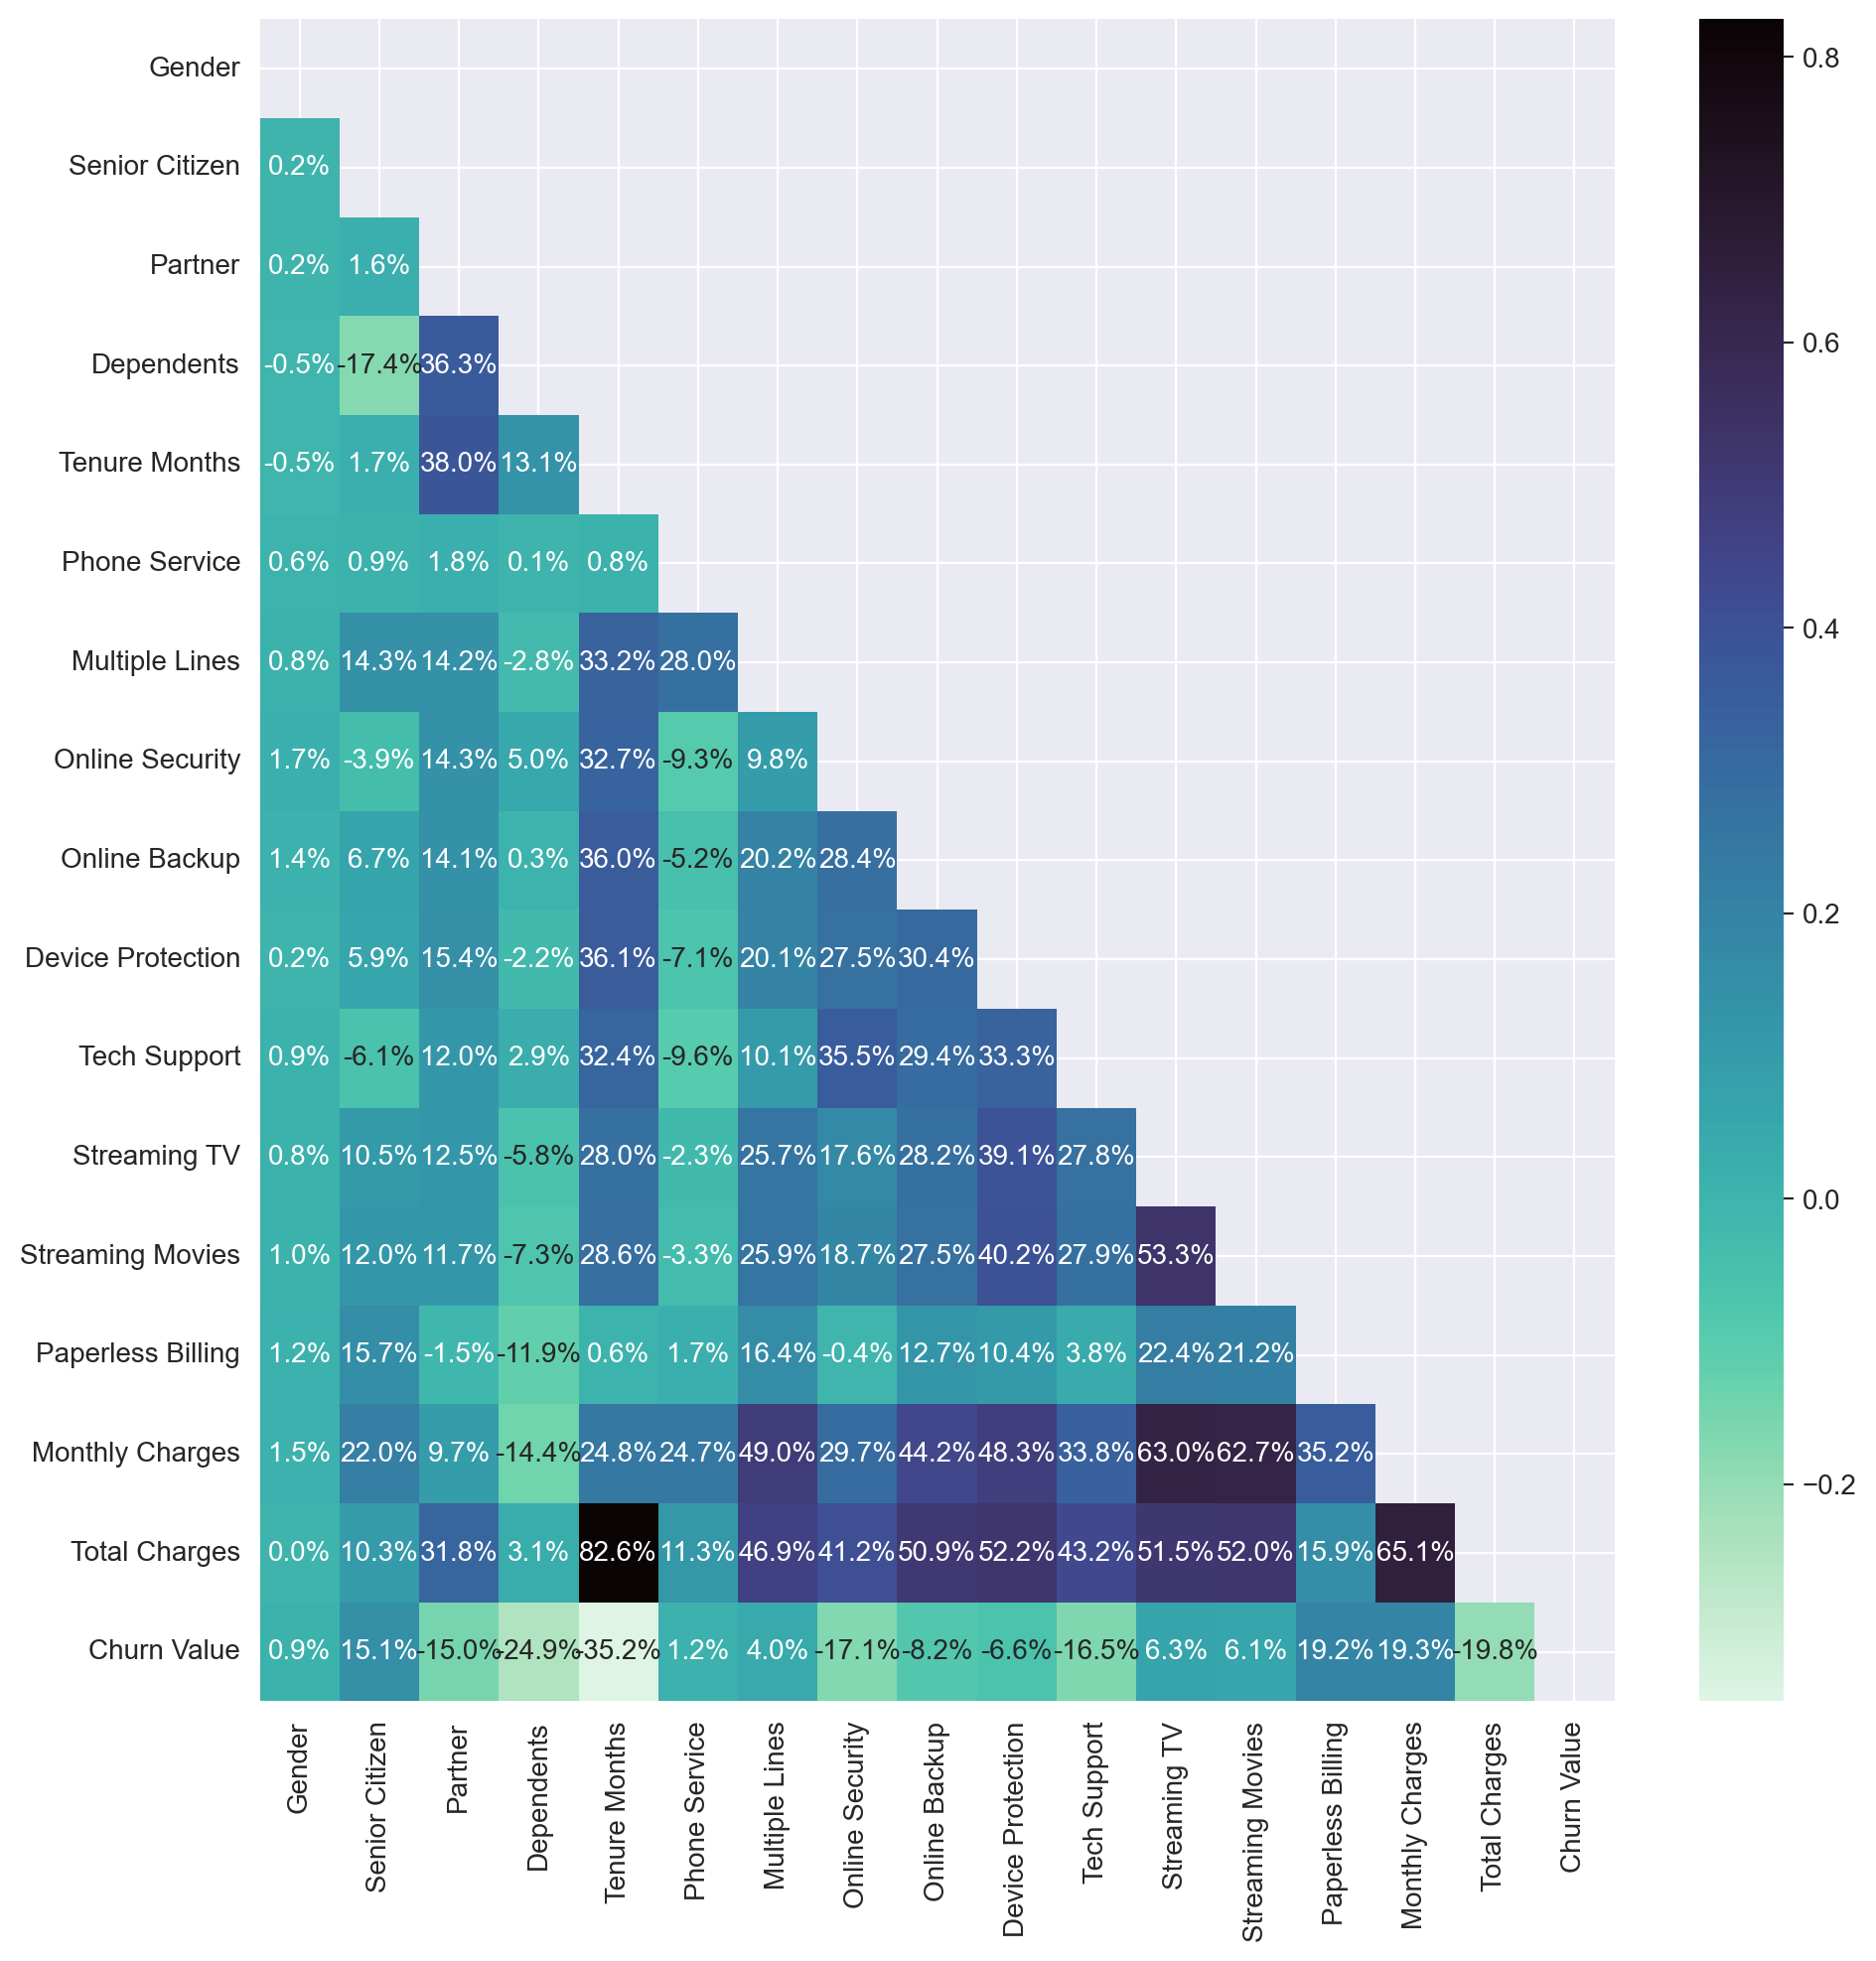

In [22]:
plt.figure(figsize=(20, 20))

## Set a correlation matrix
correlation_matrix = df1[corr_columns].corr(numeric_only=True)

## Set a mask
mask = np.triu(np.triu(correlation_matrix))

plt.figure(figsize = (11,11))
sns.heatmap(df1[corr_columns].corr(), annot = True, cmap='mako_r', fmt='.1%', mask=mask)
plt.show()

## 3. Train/Test Split, Modelling & Model Evaluation

## This screenshot shows model evaluation from previous decision tree models
### We have used this feature importance here the model selection

<img src="https://raw.githubusercontent.com/finnboulton/codecademy-git-test/main/Screenshot%202023-07-18%20at%2015.20.56.png?token=GHSAT0AAAAAACFB3GZK3775AO2FKMTBCVNUZFWVH6A"
     alt="DigitalFuturesLogo"
     style="float: center; margin-right: 10px;" />

In [23]:
## Based off feature importance from decision trees, these are the most important 11 variables
most_important = ['Contract_Month-to-month', 'Monthly Charges', 'Total Charges', 'Dependents','Tech Support',
                  'Tenure Months', 'Paperless Billing', 'Partner', 'Internet_Fiber optic', 'Online Security',
                  'Contract_Two year']

In [24]:
## Set the feature columns to the 'most important' variables
feature_cols = df1[most_important].columns
## Set the target as 'Churn Value' as this is what we are trying to predict
target = df1['Churn Value']

In [25]:
## Select the same feature columns
X = df1[feature_cols]
## Select the same target column
y = target

In [26]:
## Check X.head()
X.head()

,Contract_Month-to-month,Monthly Charges,Total Charges,Dependents,Tech Support,Tenure Months,Paperless Billing,Partner,Internet_Fiber optic,Online Security,Contract_Two year
0,1,53.85,108.15,0,0,2,1,0,0,1,0
1,1,70.70,151.65,1,0,2,1,0,1,0,0
2,1,99.65,820.50,1,0,8,1,0,1,0,0
3,1,104.80,3046.05,1,1,28,1,1,1,0,0
4,1,103.70,5036.30,1,0,49,1,0,1,0,0


In [27]:
## The same for y
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Churn Value, dtype: int64

In [28]:
# Apply the train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [29]:
## Check X train
X_train.head()

,Contract_Month-to-month,Monthly Charges,Total Charges,Dependents,Tech Support,Tenure Months,Paperless Billing,Partner,Internet_Fiber optic,Online Security,Contract_Two year
2142,0,98.65,6962.85,0,0,71,1,1,1,0,0
1623,1,93.20,1573.70,0,0,16,1,0,1,0,0
6074,0,104.05,3416.85,0,0,32,1,0,1,0,0
1362,1,40.65,933.30,0,0,24,1,1,0,0,0
6754,1,20.05,406.05,1,0,20,0,1,0,0,0


In [30]:
## Check our columns are correct
X_train.columns == feature_cols

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

In [31]:
## Check y train
y_train.head()

2142    0
1623    1
6074    0
1362    1
6754    0
Name: Churn Value, dtype: int64

In [32]:
## Check the training sets are the right ones
sum(X_train.index == y_train.index) == len(y_train)

True

In [33]:
## Check the test sets are the right ones
sum(X_test.index == y_test.index) == len(y_test)

True

## 4. Logistic Regression

In [34]:
## Set a basic logistic regression model
lr = LogisticRegression(max_iter=300, random_state=10)

In [35]:
## Fit X_train and y_train onto the data
lr.fit(X_train, y_train)
## Fit X_test and y_test onto the data
lr.fit(X_test,y_test)

LogisticRegression(max_iter=300, random_state=10)

In [36]:
## Create two new columns showing probability of staying and churning
X_train[['Proba_Stayed', 'Proba_Churned']] = lr.predict_proba(X_train)

## Set a column where it returns 1 if the probability of churning is >0.6, and 0 if not
X_train['Predicted_To_Churn'] = np.where(X_train['Proba_Churned']>.6, 1, 0)

In [37]:
## A function defining the creation of a confusion matrix
def conf_matrix(matrix):
    ax = plt.subplot()
    sns.heatmap(matrix, annot = True, ax = ax, fmt = 'g');
    ax.xaxis.set_ticklabels(['predicted negative', 'predicted positive'])
    ax.yaxis.set_ticklabels(['actual negative', 'actual positive']);
    plt.title("Confusion Matrix", fontsize= 20)
    plt.show()

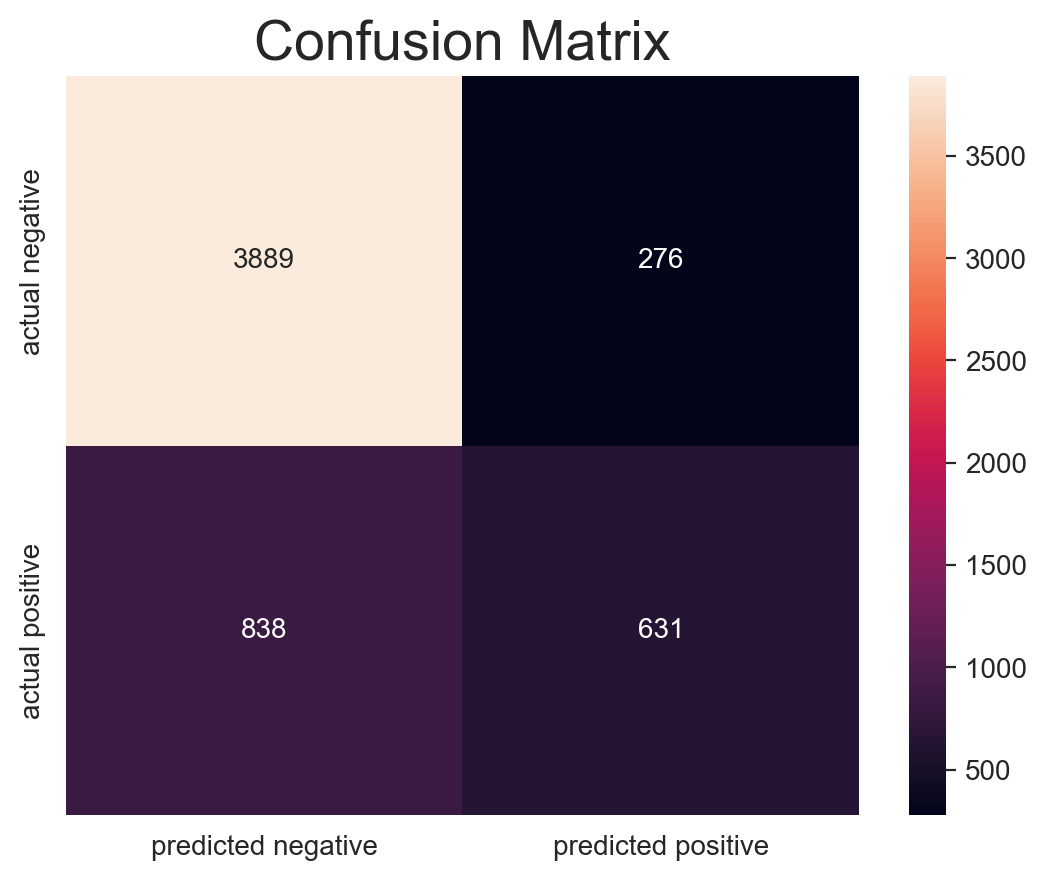

In [38]:
## Define our own confusion matrix
cm = metrics.confusion_matrix(y_train, X_train['Predicted_To_Churn'])

## Show the visualisation
conf_matrix(cm)

In [39]:
## Do the same as before but for X_test
X_test[['Proba_Stayed', 'Proba_Churned']] = lr.predict_proba(X_test)
X_test['Predicted_To_Churn'] = np.where(X_test['Proba_Churned']>.6, 1, 0)

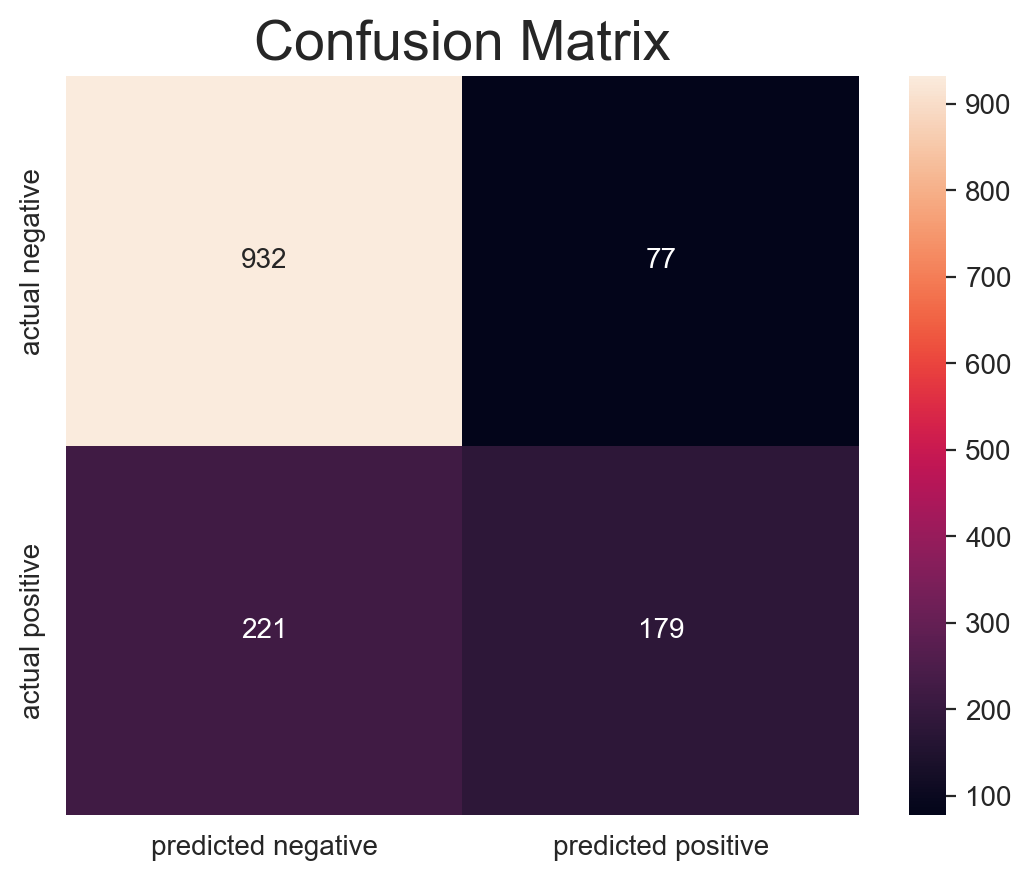

In [40]:
## As above
cm = metrics.confusion_matrix(y_test, X_test['Predicted_To_Churn'])
conf_matrix(cm)

In [41]:
## Regain the Customer IDs
customer_ids= df1['CustomerID'].copy()

In [42]:
## Let's join together our train and test data for X
XX = pd.concat([X_test, X_train]) # Includes the customer ID to the right rows of the fitted dataframe.

In [43]:
## Do the same for y
yy = pd.concat([y_test,y_train])

In [44]:
## Remerge the features and target
df_fitted = pd.concat([XX,yy],axis=1)

In [45]:
## Bring the Customer IDs back into the whole dataframe
df2_fitted = pd.concat([customer_ids, pd.DataFrame(df_fitted)], axis=1) # Includes the customer ID to the right rows of the fitted dataframe.

In [46]:
## Let's check it has worked
df2_fitted

,CustomerID,Contract_Month-to-month,Monthly Charges,Total Charges,Dependents,Tech Support,Tenure Months,Paperless Billing,Partner,Internet_Fiber optic,Online Security,Contract_Two year,Proba_Stayed,Proba_Churned,Predicted_To_Churn,Churn Value
0,3668-QPYBK,1,53.85,108.15,0,0,2,1,0,0,1,0,0.553175,0.446825,0,1
1,9237-HQITU,1,70.70,151.65,1,0,2,1,0,1,0,0,0.735587,0.264413,0,1
2,9305-CDSKC,1,99.65,820.50,1,0,8,1,0,1,0,0,0.730693,0.269307,0,1
3,7892-POOKP,1,104.80,3046.05,1,1,28,1,1,1,0,0,0.818530,0.181470,0,1
4,0280-XJGEX,1,103.70,5036.30,1,0,49,1,0,1,0,0,0.876724,0.123276,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,2569-WGERO,0,21.15,1419.40,0,0,72,1,0,0,0,1,0.988893,0.011107,0,0
7039,6840-RESVB,0,84.80,1990.50,1,1,24,1,1,0,1,0,0.971961,0.028039,0,0
7040,2234-XADUH,0,103.20,7362.90,1,0,72,1,1,1,0,0,0.957127,0.042873,0,0
7041,4801-JZAZL,1,29.60,346.45,1,0,11,1,1,0,1,0,0.912378,0.087622,0,0


In [47]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate Accuracy
accuracy = accuracy_score(df2_fitted['Churn Value'], yy)

# Calculate Precision
precision = precision_score(df2_fitted['Churn Value'], yy)

# Calculate Recall
recall = recall_score(df2_fitted['Churn Value'], yy)

# Calculate F1-Score
f1 = f1_score(df2_fitted['Churn Value'], yy)

In [48]:
print (accuracy, precision, recall, f1)

0.6177765156893369 0.279828785446763 0.279828785446763 0.279828785446763


In [49]:
## For sanity, lets check for null values
df2_fitted.isnull().sum()

CustomerID                 0
Contract_Month-to-month    0
Monthly Charges            0
Total Charges              0
Dependents                 0
Tech Support               0
Tenure Months              0
Paperless Billing          0
Partner                    0
Internet_Fiber optic       0
Online Security            0
Contract_Two year          0
Proba_Stayed               0
Proba_Churned              0
Predicted_To_Churn         0
Churn Value                0
dtype: int64

##### Top 500 List

In [50]:
## Get all the customers who haven't churned
dfcv0 = df2_fitted[df2_fitted['Churn Value'] == 0]

In [51]:
## To find the 500 most at risk of churning, sort descending and take head(500)
top_500 = dfcv0.sort_values(['Proba_Churned'],ascending=False).head(500)

In [52]:
## Take the customer ID and the probability of churning
top500_c = top_500[['CustomerID','Proba_Churned']].copy()
## Rename the column
top500_c.rename(columns = {"Proba_Churned":"LogReg_Probability"}, inplace = True)

In [53]:
# Create a rank index column based on the 'Score' column
top500_c['Rank'] = top500_c['LogReg_Probability'].rank(ascending=False)

In [54]:
## Reorder the columns
top500_c = top500_c[['Rank', 'CustomerID', 'LogReg_Probability']]
## Set the Rank as the Index
top500_c = top500_c.set_index('Rank')

In [55]:
## Check how it looks
top500_c

,CustomerID,LogReg_Probability
Rank,,
1.0,4929-XIHVW,0.793057
2.0,4927-WWOOZ,0.789043
3.0,3489-HHPFY,0.780906
4.0,2880-FPNAE,0.771749
5.0,6630-UJZMY,0.770653
...,...,...
496.0,8819-IMISP,0.530163
497.0,5916-QEWPT,0.530058
498.0,1730-ZMAME,0.529663


In [56]:
## Save it to a CSV
top500_c.to_csv('Top_500_Customers_likely_to_Churn.csv')

##### Remaining customers likely to churn

In [57]:
## Quick maths to find how many customers are left!
#5174 - 500 = 4674

In [58]:
## Get a dataframe of the remaining customers
remaining_c = dfcv0.sort_values(['Proba_Churned'],ascending=False).tail(4674).copy()

In [59]:
## Do the same as before with getting the specific columns
remaining_c_c = remaining_c[['CustomerID','Proba_Churned']].copy()
remaining_c_c.rename(columns = {"Proba_Churned":"LogReg_Probability"}, inplace = True)

In [60]:
## Check it has worked
remaining_c_c

,CustomerID,LogReg_Probability
5216,9029-FEGVJ,0.529275
5225,4329-YPDDQ,0.529043
6060,3312-ZWLGF,0.527841
6733,8404-FYDIB,0.527820
6946,9108-EJFJP,0.527791
...,...,...
2330,2804-ETQDK,0.001594
2520,1764-VUUMT,0.001560
6090,8882-TLVRW,0.001507
4800,9365-CSLBQ,0.001381


In [61]:
## Save to CSV
remaining_c_c.to_csv('Remaining_Customers_List.csv')

# Appendix
## Decision Trees
We decided to use Logistic regression as our main model, as both Decision trees and Logistic regression provided similar metrics, however Logistic regression ran much more faster.

In [62]:
# Set a decision tree classifier with max depth of 5 and random state at 42
treeclf = DecisionTreeClassifier(max_depth=5, random_state=42)

# Fit on the training data
treeclf.fit(X_train1, y_train1)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [63]:
# Check that the classes are binary

treeclf.classes_

array([0, 1], dtype=int64)

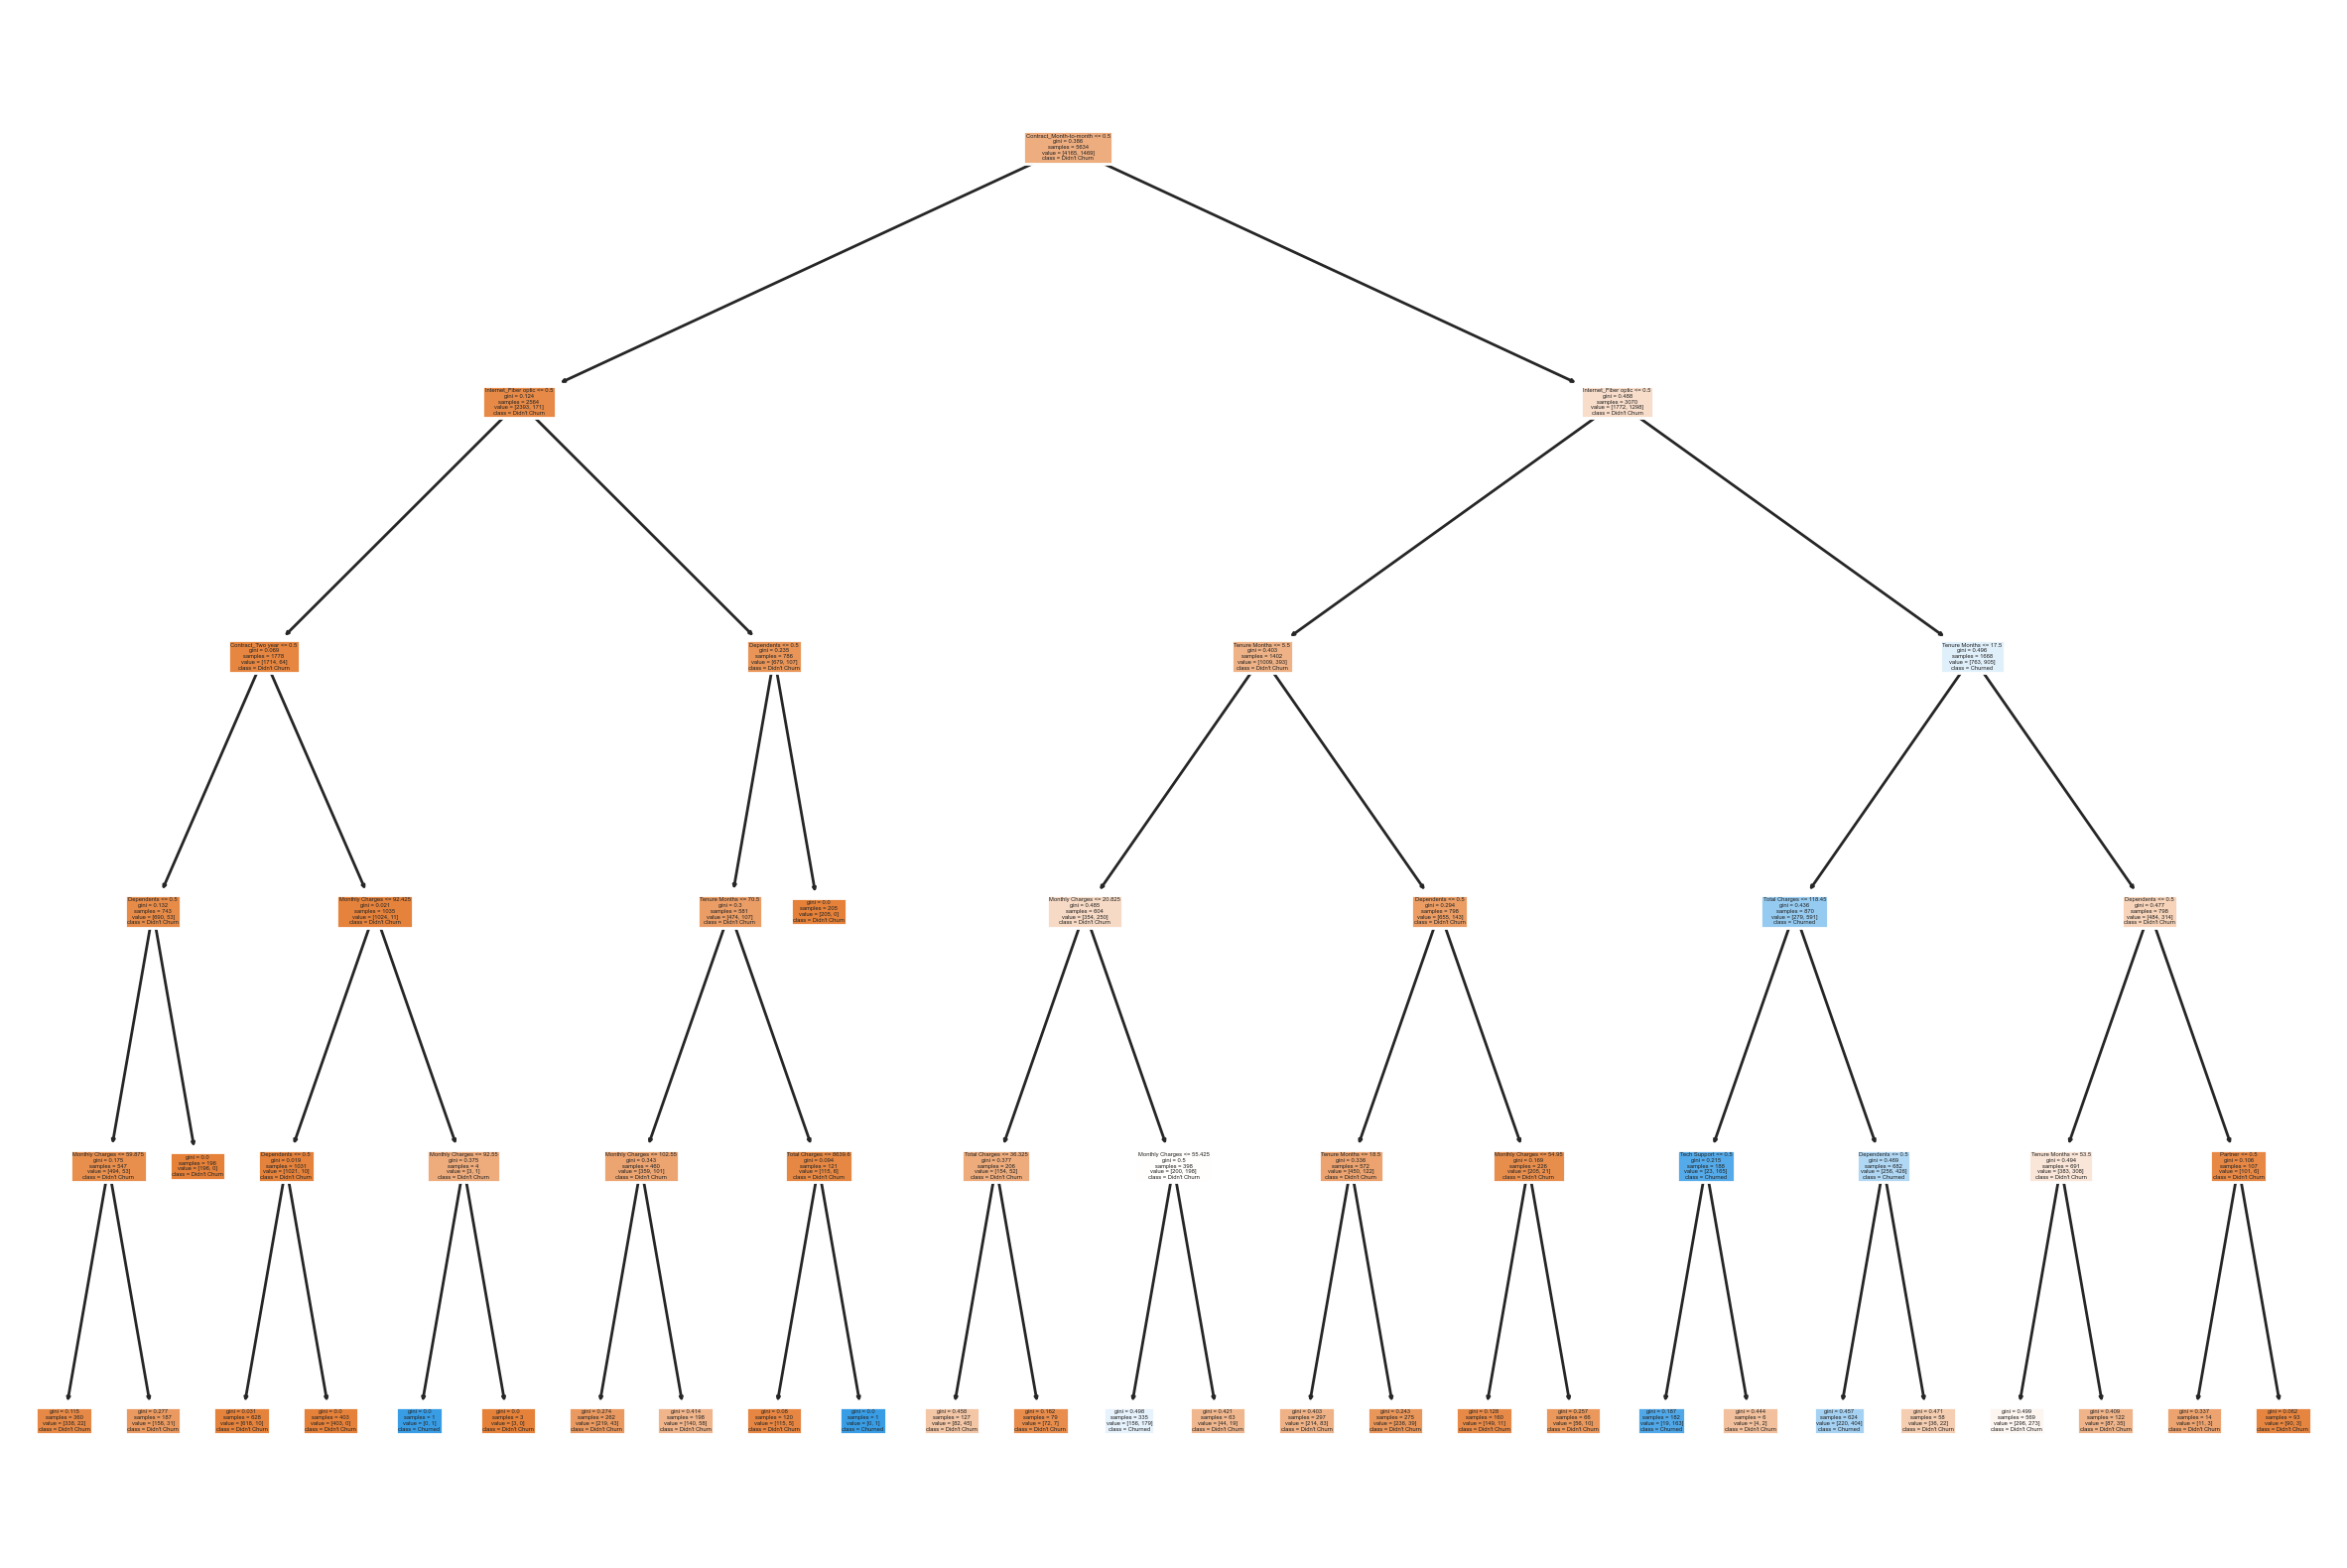

In [64]:
# Visualise the results

fig = plt.figure(figsize=(15,10))


thing = tree.plot_tree(treeclf, 
                       feature_names=feature_cols, 
                       class_names=['Didn\'t Churn', 'Churned'],
                       filled=True)

plt.show()

In [65]:
print(f'Score on training set: {treeclf.score(X_train1, y_train1)}')
print(f'Score on testing set: {treeclf.score(X_test1, y_test1)}')

Score on training set: 0.8019169329073482
Score on testing set: 0.7885024840312278


In [66]:
grid = GridSearchCV(estimator = DecisionTreeClassifier(), ## Classifier/Algorithm
                    param_grid = {'max_depth': [5, 10, 15, 20], ## How many levels can I go?
                                  'min_samples_split': [20, 40, 60, 100, 200, 500], ## How many samples needed
                                  ## in a node for me to split?
                                  'min_samples_leaf': [10, 20, 30, 50, 100], ## How many samples needed in a
                                  ## node for me to call it a leaf
                                  'max_features':[2,5,10,15]}, ## How many features can I use from the data?
                    
                    cv = 10, ## Number of Cross Validation folds
                    refit = True, ## What do I do for each fold?
                    verbose = 1, ## Available options are: 0, 1, 2 (least to most verbose)
                    scoring = 'accuracy') ## What performance metric do you want to prioritise?

In [67]:
# Run the gridsearch

## Set the current time from your local machine
now = time()

## Run the gridsearch
grid.fit(X_train1, y_train1)

## Subtract the 'now' time from the current time
print(f' Time in seconds: {time() - now}')


Fitting 10 folds for each of 480 candidates, totalling 4800 fits
 Time in seconds: 39.14985179901123


In [68]:
# Find out what the best parameters are
grid.best_params_

{'max_depth': 10,
 'max_features': 2,
 'min_samples_leaf': 20,
 'min_samples_split': 200}

In [69]:
# Find out the best score - ACCURACY
grid.best_score_

0.8022715820767671

In [70]:
dt = grid.best_estimator_
dt

DecisionTreeClassifier(max_depth=10, max_features=2, min_samples_leaf=20,
                       min_samples_split=200)

In [71]:
dt.fit(X_train1, y_train1)

DecisionTreeClassifier(max_depth=10, max_features=2, min_samples_leaf=20,
                       min_samples_split=200)

In [72]:
print(f'Score on training set: {dt.score(X_train1, y_train1)}')
print(f'Score on testing set: {dt.score(X_test1, y_test1)}')

Score on training set: 0.7996095136670217
Score on testing set: 0.7785663591199432


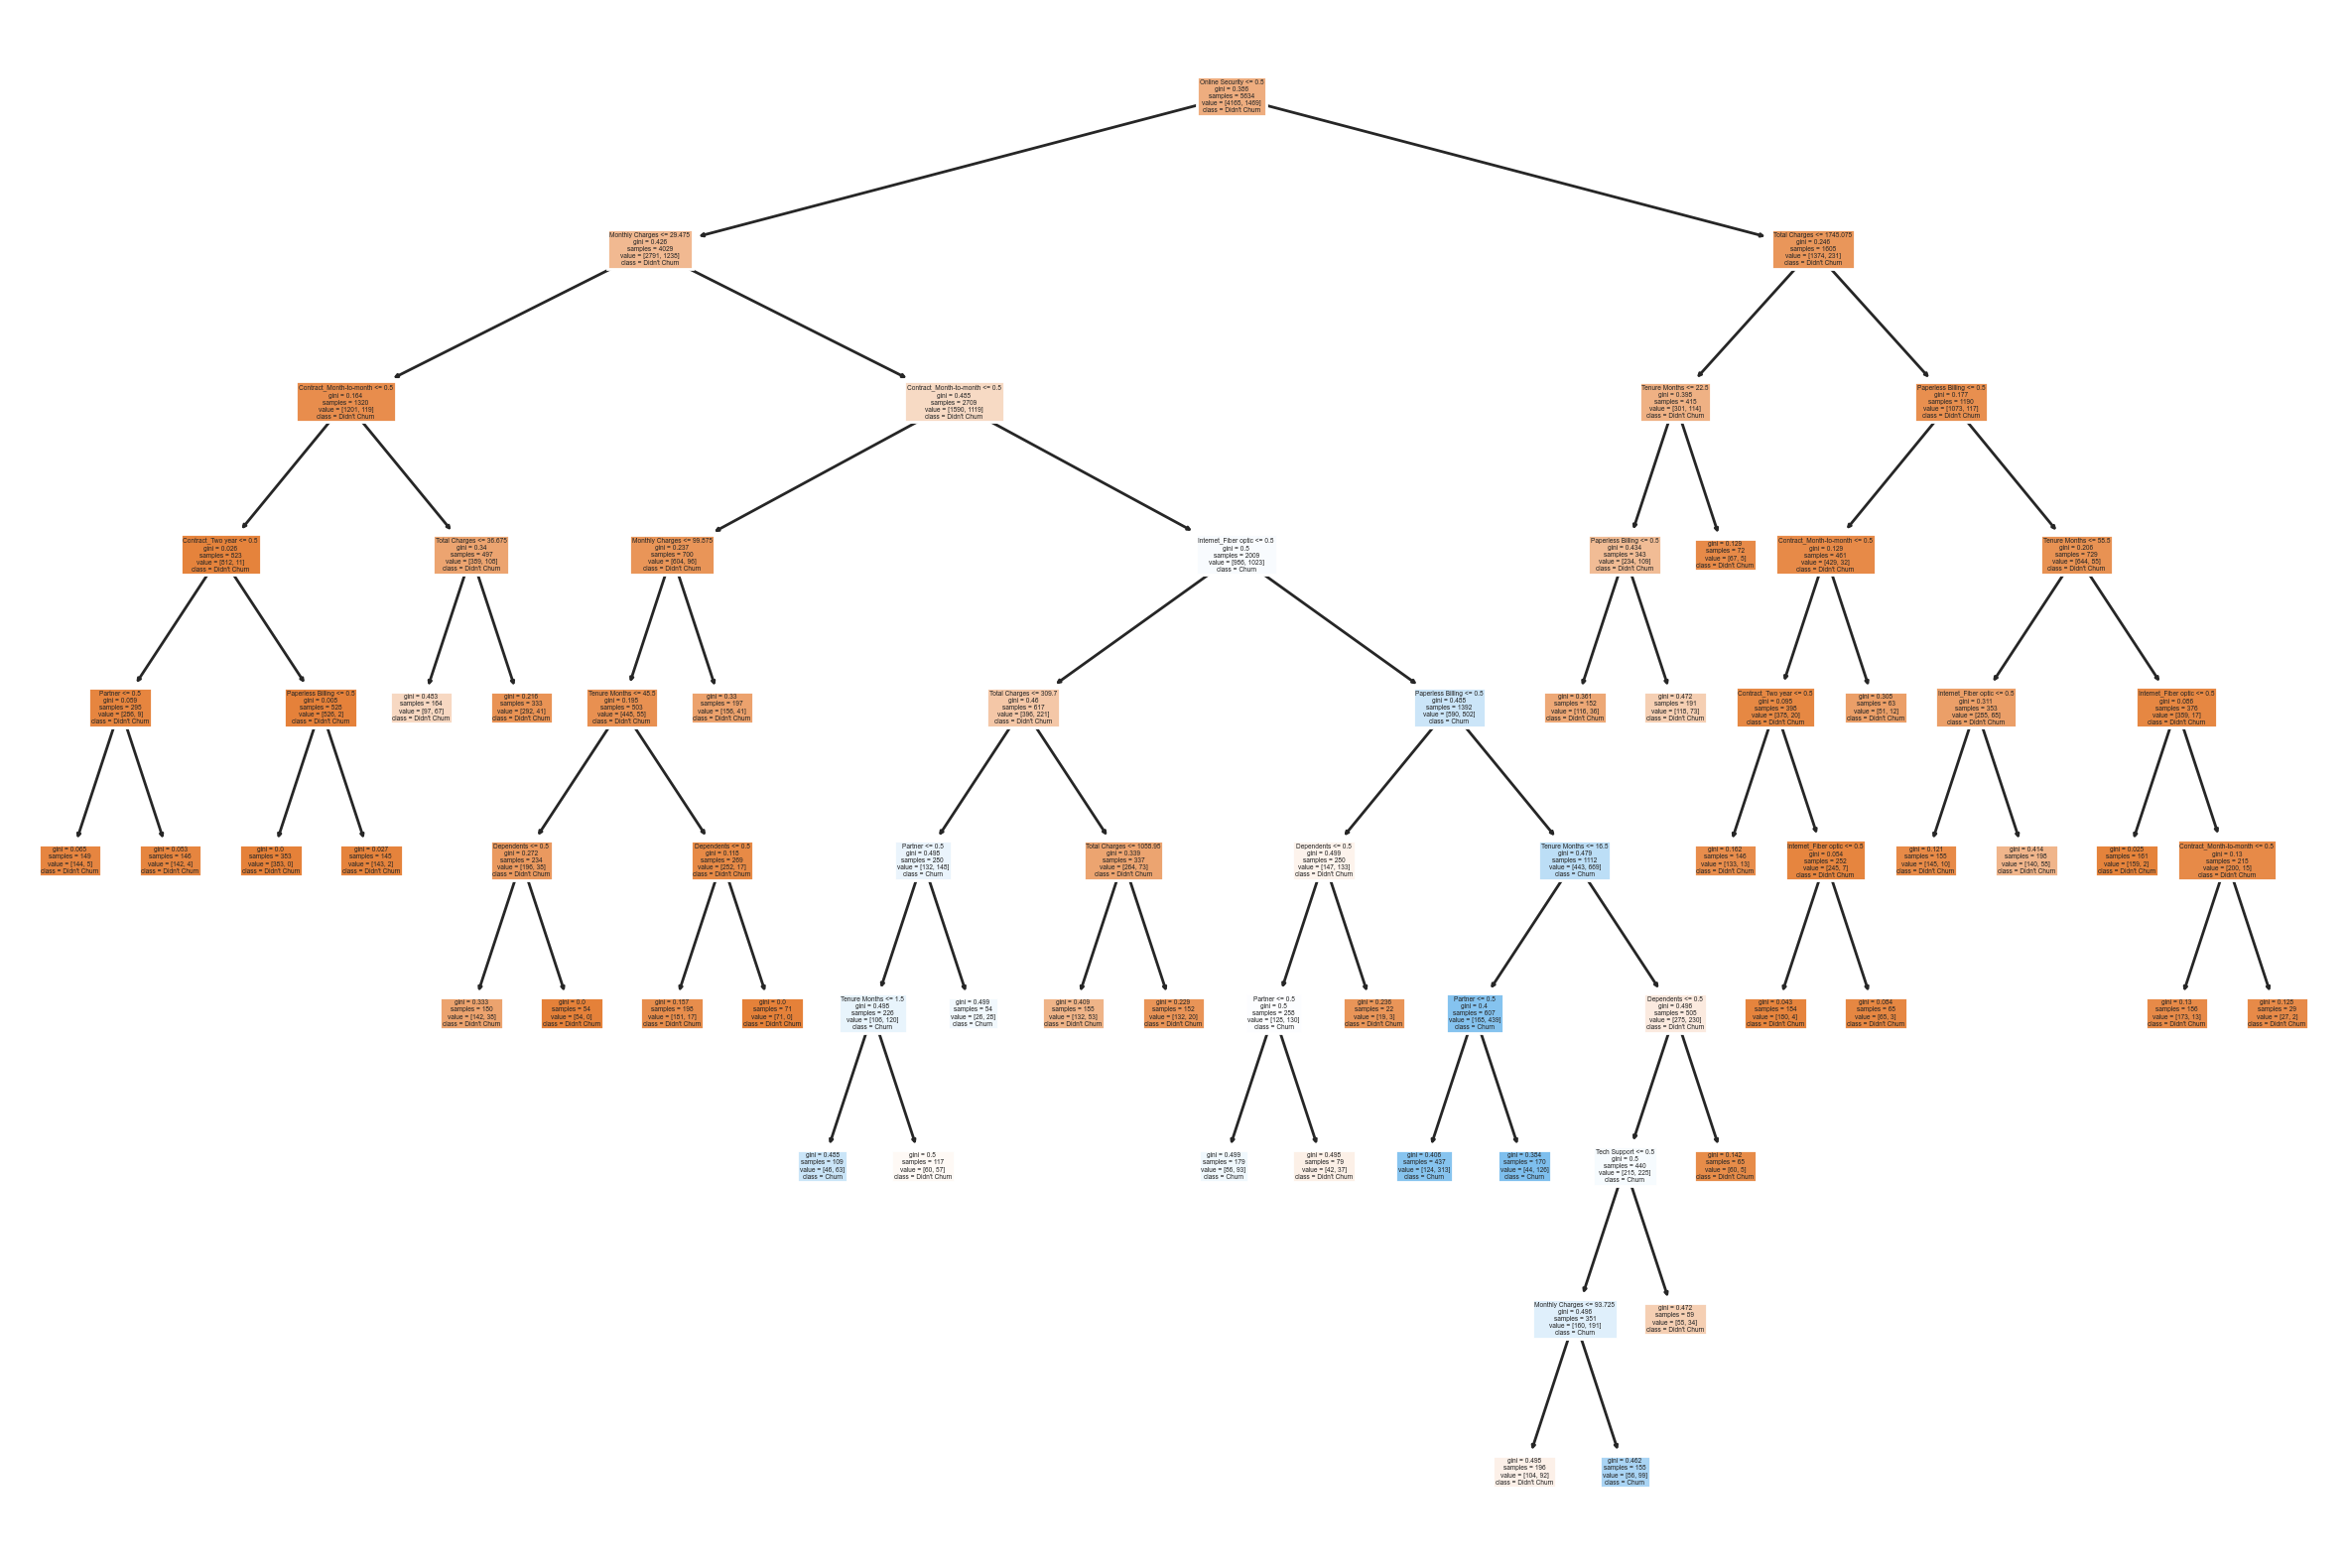

In [73]:
fig = plt.figure(figsize=(15,10))
thing = tree.plot_tree(dt, ## Classifier/Algorithm
                   feature_names=feature_cols, ## Use all feature columns  
                   class_names=['Didn\'t Churn', 'Churn'], ## Select our class names
                   filled=True) ## Colour the tree

In [74]:
# A random DT Classifier
tree = DecisionTreeClassifier(random_state=42)

# Get the scores
scores = cross_val_score(tree, ## The algorithm/model/estimator/classifier
                         X_train1, ## The training data (features)
                         y_train1, ## The target
                         cv = 10) ## How many folds?

In [75]:
scores

array([0.75      , 0.73404255, 0.7429078 , 0.7464539 , 0.76731794,
       0.75843694, 0.76021314, 0.70692718, 0.77087034, 0.69626998])

In [76]:
sum(scores) / len(scores)

0.7433439779297835

In [77]:
rf = RandomForestClassifier(n_estimators=50)
et = ExtraTreesClassifier(n_estimators=50)

In [78]:
def apr(y_pred, y_real):
    """ Calculates accuracy, precision, recall
        Requires predicted value first, and then the real value
    """
    accuracy = metrics.accuracy_score(y_real, y_pred)
    precision = metrics.precision_score(y_real, y_pred)
    recall = metrics.recall_score(y_real, y_pred)
    f1 = metrics.f1_score(y_real, y_pred)
    
    print(f"Accuracy:{accuracy}")
    print(f"Precision:{precision}")
    print(f"Recall:{recall}")
    print(f"F1:{f1}")
    return accuracy, precision, recall, f1

## Fancy way to produce a confusion matrix
def produce_confusion(positive_label:str, negative_label:str, cut_off, df, y_pred_name, y_real_name):
    
    #Set pred to 0 or 1 depending on whether it's higher than the cut_off point.
    
    if cut_off != 'binary':      
        df['pred_binary'] = np.where(df[y_pred_name] > cut_off , 1, 0)
    else: 
        df['pred_binary'] = df[y_pred_name]
    
    #Build the CM
    cm = confusion_matrix(df[y_real_name], df['pred_binary'])  
    
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax=ax, fmt='g'); 

    # labels, title, ticks
    ax.set_xlabel('Predicted labels');ax.set_ylabel('Real labels'); 
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels([negative_label, positive_label])
    ax.yaxis.set_ticklabels([negative_label, positive_label]);

    print('Test accuracy = ', accuracy_score(df[y_real_name], df['pred_binary']))

    return accuracy_score(df[y_real_name], df['pred_binary'])

In [79]:
## Generate the predictions on X_train
train_results = X_train1.copy()
train_results['y_pred'] = dt.predict(X_train1)
train_results['y_real'] = y_train1
train_results['y_prob'] = dt.predict_proba(X_train1)[:,1] ## Probability of it landing in a class

train_results

,Contract_Month-to-month,Monthly Charges,Total Charges,Dependents,Tech Support,Tenure Months,Paperless Billing,Partner,Internet_Fiber optic,Online Security,Contract_Two year,y_pred,y_real,y_prob
2142,0,98.65,6962.85,0,0,71,1,1,1,0,0,0,0,0.085859
1623,1,93.20,1573.70,0,0,16,1,0,1,0,0,1,1,0.716247
6074,0,104.05,3416.85,0,0,32,1,0,1,0,0,0,0,0.208122
1362,1,40.65,933.30,0,0,24,1,1,0,0,0,0,1,0.286486
6754,1,20.05,406.05,1,0,20,0,1,0,0,0,0,0,0.123123
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3772,0,100.40,4303.65,1,1,42,1,1,1,0,1,0,0,0.208122
5191,0,20.70,762.45,0,0,39,0,0,0,0,1,0,0,0.000000
5226,0,20.20,387.40,1,0,19,0,1,0,0,1,0,0,0.000000
5390,0,19.90,666.00,1,0,35,0,1,0,0,0,0,0,0.027397


In [80]:
# Same for X_test

test_results = X_test1.copy()
test_results['y_pred'] = dt.predict(X_test1)
test_results['y_real'] = y_test1
test_results['y_prob'] = dt.predict_proba(X_test1)[:,1]

test_results

,Contract_Month-to-month,Monthly Charges,Total Charges,Dependents,Tech Support,Tenure Months,Paperless Billing,Partner,Internet_Fiber optic,Online Security,Contract_Two year,y_pred,y_real,y_prob
185,1,85.90,1269.55,0,0,15,1,0,1,0,0,1,1,0.716247
2715,1,56.80,1074.65,0,0,18,0,1,0,0,0,0,0,0.131579
3825,1,20.00,40.90,0,0,2,1,0,0,0,0,0,0,0.123123
1807,1,84.20,519.15,0,0,6,1,1,1,0,0,1,1,0.741176
132,1,104.80,4131.95,0,1,40,0,0,1,0,0,1,1,0.519553
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6366,0,104.90,6891.45,1,0,66,1,1,1,0,0,0,0,0.208122
315,1,86.00,1532.45,0,0,19,1,0,1,0,0,0,1,0.469388
2439,1,90.35,190.50,0,0,2,0,1,1,1,0,0,0,0.236842
5002,0,110.20,7467.50,1,0,68,1,1,1,1,1,0,0,0.069892


In [81]:
## Check the train data scores
train_scores = apr(train_results['y_pred'], train_results['y_real'])

Accuracy:0.7996095136670217
Precision:0.6539855072463768
Recall:0.4914908100748809
F1:0.5612125923047027


In [82]:
## Check the test data scores
test_scores = apr(test_results['y_pred'], test_results['y_real'])

Accuracy:0.7785663591199432
Precision:0.6517241379310345
Recall:0.4725
F1:0.5478260869565217


In [83]:
## Set new classifiers: Random Forests and Extra Trees
rf = RandomForestClassifier(n_estimators=50)
et = ExtraTreesClassifier(n_estimators=50)

In [84]:
## Generate cross validation scores for both

rf_score = cross_val_score(rf, X_train1, y_train1, cv=5)
et_score = cross_val_score(et, X_train1, y_train1, cv=5)

print(f'Random scored {rf_score}')
print(f'Extra Random scored {et_score}')

Random scored [0.79325643 0.7905945  0.79236912 0.78438332 0.78063943]
Extra Random scored [0.77994676 0.77018634 0.77639752 0.7755102  0.75932504]


In [85]:
## Find what the best parameters are for the predictions
rf_params = {
    'n_estimators': [100, 150, 200], ## Number of estimators
    'max_depth': [None, 1, 2, 3, 4, 5], ## Maximum depth of each tree
}


gs = GridSearchCV(rf, param_grid=rf_params, cv=5) ## Gridsearch

gs.fit(X_train, y_train) ## Fit on the train

print(gs.best_score_)

gs.best_params_ ## Get the best parameters

0.8113257504716305


{'max_depth': 5, 'n_estimators': 100}

In [86]:
## Find the accuracy of the random forest predictor
gs.score(X_train, y_train)

0.8221512247071352

### If you have any questions, please don't hesitate to contact us